In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/titanic.csv", skipinitialspace=True)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature preprocessing (light)

In [4]:
# missing values
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# remove useless variables
column2drop = ["PassengerId", "Name", "Cabin", "Ticket", "SibSp", "Parch"]
df.drop(column2drop, axis=1, inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


## Pattern mining preprocessing

In [6]:
df["AgeBin"] = pd.qcut(df["Age"], 4)
df["FareBin"] = pd.qcut(df["Fare"], 4)

df.drop(["Age", "Fare"], axis=1, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Embarked,AgeBin,FareBin
0,0,3,male,S,"(21.5, 26.0]","(-0.001, 7.91]"
1,1,1,female,C,"(36.0, 80.0]","(31.0, 512.329]"
2,1,3,female,S,"(21.5, 26.0]","(7.91, 14.454]"
3,1,1,female,S,"(26.0, 36.0]","(31.0, 512.329]"
4,0,3,male,S,"(26.0, 36.0]","(7.91, 14.454]"


In [8]:
df["AgeBin"] = df["AgeBin"].astype(str) + "_Age"
df["FareBin"] = df["FareBin"].astype(str) + "_Fare"
df["Embarked"] = df["Embarked"] + "_Port"

In [9]:
df.head()

,Survived,Pclass,Sex,Embarked,AgeBin,FareBin
0,0,3,male,S_Port,"(21.5, 26.0]_Age","(-0.001, 7.91]_Fare"
1,1,1,female,C_Port,"(36.0, 80.0]_Age","(31.0, 512.329]_Fare"
2,1,3,female,S_Port,"(21.5, 26.0]_Age","(7.91, 14.454]_Fare"
3,1,1,female,S_Port,"(26.0, 36.0]_Age","(31.0, 512.329]_Fare"
4,0,3,male,S_Port,"(26.0, 36.0]_Age","(7.91, 14.454]_Fare"


In [10]:
surv_dict = {0: "Not Survived", 1: "Survived"}
df["Survived"] = df["Survived"].map(surv_dict)

pclass_dict = {1: "1st_class", 2: "2nd_class", 3: "3rd_class"}
df["Pclass"] = df["Pclass"].map(pclass_dict)

In [11]:
df.head()

,Survived,Pclass,Sex,Embarked,AgeBin,FareBin
0,Not Survived,3rd_class,male,S_Port,"(21.5, 26.0]_Age","(-0.001, 7.91]_Fare"
1,Survived,1st_class,female,C_Port,"(36.0, 80.0]_Age","(31.0, 512.329]_Fare"
2,Survived,3rd_class,female,S_Port,"(21.5, 26.0]_Age","(7.91, 14.454]_Fare"
3,Survived,1st_class,female,S_Port,"(26.0, 36.0]_Age","(31.0, 512.329]_Fare"
4,Not Survived,3rd_class,male,S_Port,"(26.0, 36.0]_Age","(7.91, 14.454]_Fare"


In [12]:
X = df.values.tolist()

In [13]:
X[0]

['Not Survived',
 '3rd_class',
 'male',
 'S_Port',
 '(21.5, 26.0]_Age',
 '(-0.001, 7.91]_Fare']

# Pattern Mining

## Apriori

In [14]:
# !pip install pyfim

In [15]:
from fim import apriori

In [16]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [17]:
# frequent itemset >= min_supp
# closed: an itemset is closed if none of its immediate supersets has the same support as the itemset
# maximal: an itemset is maximal frequent if none of its immediate supersets is frequent

### Frequent Itemset

In [18]:
# supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"((-0.001, 7.91]_Fare, 3rd_class)",23.681257
1,"((-0.001, 7.91]_Fare, Not Survived)",20.089787
2,"((-0.001, 7.91]_Fare, male)",20.202020
3,"((7.91, 14.454]_Fare, S_Port)",22.446689
4,"((0.419, 21.5]_Age, 3rd_class)",20.538721
5,"(female, Survived)",26.150393
6,"(female, S_Port)",23.007856
7,"(Survived, S_Port)",24.579125
8,"(3rd_class, Not Survived)",41.750842
9,"(3rd_class, Not Survived, male)",33.670034


### Closed Itemsets

In [19]:
# supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"((-0.001, 7.91]_Fare, 3rd_class)",23.681257
1,"((-0.001, 7.91]_Fare, Not Survived)",20.089787
2,"((-0.001, 7.91]_Fare, male)",20.202020
3,"((7.91, 14.454]_Fare, S_Port)",22.446689
4,"((0.419, 21.5]_Age, 3rd_class)",20.538721
5,"(female, Survived)",26.150393
6,"(female, S_Port)",23.007856
7,"(Survived, S_Port)",24.579125
8,"(3rd_class, Not Survived)",41.750842
9,"(3rd_class, Not Survived, male)",33.670034


### Maximal Itemsets

In [20]:
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"((-0.001, 7.91]_Fare, 3rd_class)",23.681257
1,"((-0.001, 7.91]_Fare, Not Survived)",20.089787
2,"((-0.001, 7.91]_Fare, male)",20.202020
3,"((7.91, 14.454]_Fare, S_Port)",22.446689
4,"((0.419, 21.5]_Age, 3rd_class)",20.538721
5,"(female, Survived)",26.150393
6,"(female, S_Port)",23.007856
7,"(Survived, S_Port)",24.579125
8,"(3rd_class, Not Survived, male, S_Port)",25.925926


### Support plots

There is no a perfect support to use to cut somewhat, we're not searching something perfect but if we pick a support low we will get a lot of itemsets, more itemset we extract more we should check to decide, higher is the support lower will be the number of itemsets. Patt

#### Support vs number of itemsets

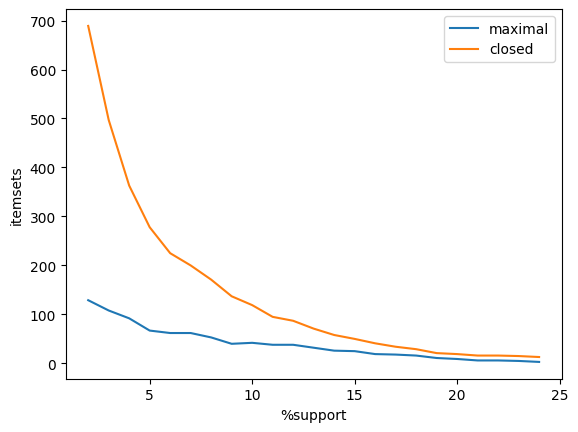

In [21]:
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

#### Support vs number of itemset for survived / not survived

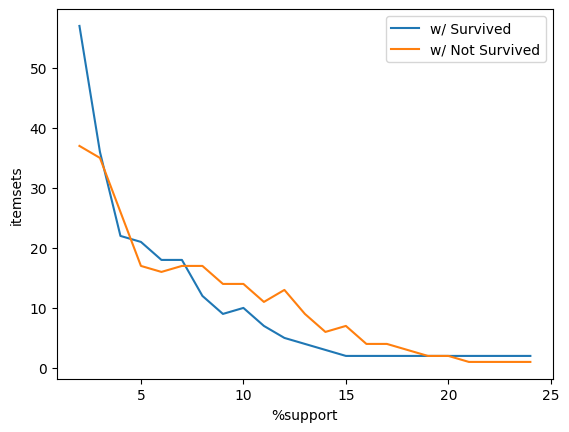

In [22]:
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "Survived" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "Not Survived" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="w/ Survived")
plt.plot(np.arange(2, max_supp), filter_2, label="w/ Not Survived")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

### Rules

We can ask for rules expressing the minimum confidence of association rules

In [23]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

if the target is association rules:
                a list of rules (i.e. tuples with two or more elements),
                each consisting of a head/consequent item, a tuple with
                a body/antecedent item set, and the values selected by
                the parameter 'report', which may be combined into a
                tuple or a list if report[0] is '(' or '[', respectively.

In [24]:
conf = 60
rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
5,"(31.0, 512.329]_Fare","(1st_class,)",159,17.845118,0.736111,2.954392
6,1st_class,"((31.0, 512.329]_Fare,)",159,17.845118,0.716216,2.954392
41,Survived,"(female,)",233,26.150393,0.742038,1.933205
42,female,"(Survived,)",233,26.150393,0.681287,1.933205
40,female,"(Survived, S_Port)",142,15.937149,0.648402,1.839892
...,...,...,...,...,...,...
35,S_Port,"((0.419, 21.5]_Age, 3rd_class)",120,13.468013,0.655738,0.904431
43,S_Port,"(female,)",205,23.007856,0.652866,0.900470
44,S_Port,"(Survived,)",219,24.579125,0.640351,0.883208
26,S_Port,"((-0.001, 7.91]_Fare,)",138,15.488215,0.618834,0.853531


### Classification

In [25]:
rules_df[rules_df["consequent"] == "Survived"]

,consequent,antecedent,abs_support,%_support,confidence,lift
7,Survived,"(1st_class,)",136,15.263749,0.629630,1.640351
39,Survived,"(female, S_Port)",142,15.937149,0.692683,1.804621
41,Survived,"(female,)",233,26.150393,0.742038,1.933205


In [26]:
print("to_predict:", [r for r in rules if r[0] == "Survived"][0][0])
print("how?", [r for r in rules if r[0] == "Survived"][0][1])

to_predict: Survived
how? ('1st_class',)


In [27]:
# left for exercise

# using the same test set for classification (w/ random_state):
# predict the target variable with the most interesting rule:
# .... e.g., the most frequent;
# .... e.g., the one w/ max lift
# build a list of prediction, e.g. ['Survived', 'Not Survived', 'Survived']
# evaluate this prediction with precision/recall/confusion matrix etc.

In [28]:
len_r = []
min_sup = 1
max_sup = 20
min_conf = 50
max_conf = 90
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)

This can help to choose threshold

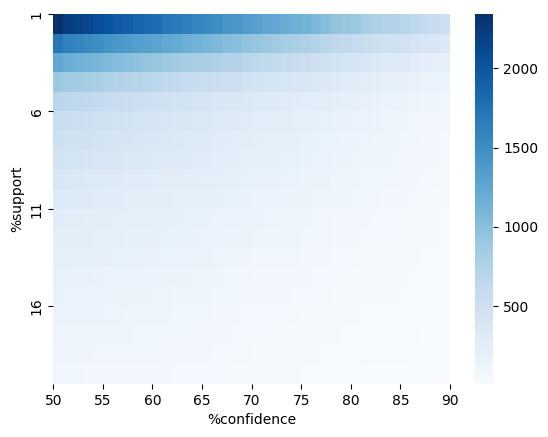

In [29]:
sns.heatmap(len_r, cmap="Blues", fmt='g')
plt.yticks(np.arange(0, max_sup-min_sup +1, 5), np.arange(min_sup, max_sup+1,5 ))
plt.xticks(np.arange(0, max_conf-min_conf+1, 5), np.arange(min_conf, max_conf+1, 5))
plt.xlabel("%confidence")
plt.ylabel("%support")
plt.show()

## FP-Growth

In [30]:
from fim import fpgrowth

In [31]:
help(fpgrowth)

Help on built-in function fpgrowth in module fim:

fpgrowth(...)
    fpgrowth (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
              eval='x', agg='x', thresh=10, prune=Nobe, algo='s', mode='',
              border=None)
    Find frequent item sets with the FP-growth algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support 

In [32]:
supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(male, S_Port)",49.494949
1,"(Not Survived, S_Port)",47.923681
2,"(Not Survived, male, S_Port)",40.852974
3,"(Not Survived, male)",52.525253
4,"(3rd_class, S_Port)",39.618406
5,"(3rd_class, male, S_Port)",29.741863
6,"(3rd_class, male)",38.945006
7,"(3rd_class, Not Survived, S_Port)",32.098765
8,"(3rd_class, Not Survived, male, S_Port)",25.925926
9,"(3rd_class, Not Survived, male)",33.670034


In [33]:
conf = 70
rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

,consequent,antecedent,abs_support,%_support,confidence,lift
0,S_Port,"(male,)",441,49.494949,0.764298,1.054163
1,S_Port,"(Not Survived,)",427,47.923681,0.777778,1.072755
2,S_Port,"(Not Survived, male)",364,40.852974,0.777778,1.072755
3,male,"(Not Survived, S_Port)",364,40.852974,0.852459,1.316362
4,Not Survived,"(male, S_Port)",364,40.852974,0.825397,1.339578
5,male,"(Not Survived,)",468,52.525253,0.852459,1.316362
6,Not Survived,"(male,)",468,52.525253,0.811092,1.316362
7,S_Port,"(3rd_class,)",353,39.618406,0.718941,0.991604
8,S_Port,"(3rd_class, male)",265,29.741863,0.763689,1.053323
9,male,"(3rd_class, S_Port)",265,29.741863,0.750708,1.159239
